In [19]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib as plt

In [2]:
df = pd.read_csv('/Users/changlu/Downloads/experiment_dataset.csv')

In [3]:
df

,Unnamed: 0,Age,Location,Device,Variant,Time Spent,CTR
0,0,62,Location2,Device2,Control,13.928669,0.084776
1,1,18,Location1,Device1,Variant B,11.310518,0.096859
2,2,21,Location2,Device1,Variant B,24.842100,0.097630
3,3,21,Location1,Device3,Variant B,20.061300,0.109783
4,4,57,Location1,Device2,Variant B,34.495503,0.068579
...,...,...,...,...,...,...,...
995,995,39,Location2,Device2,Variant B,17.252030,0.092211
996,996,38,Location3,Device2,Control,30.075898,0.078151
997,997,60,Location2,Device3,Control,31.929223,0.125213
998,998,35,Location2,Device2,Variant B,14.680299,0.095423


In [23]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

Starting by the order of the column: age, location, device, variant.
#Because there are too many different 'ages', I would use regression to check if age has a upward or downward trend on CTR or time spent


ValueError: Could not interpret value `Age` for parameter `x`

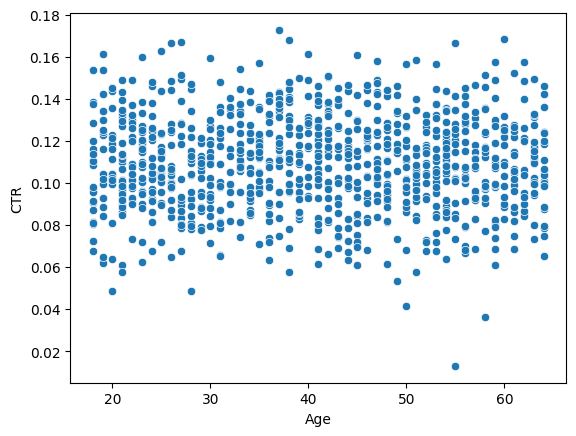

In [26]:
#Age and CTR:
x_ctr = df[['Age']]
y_ctr = df['CTR']
model_ctr = LinearRegression()
model_ctr.fit(x_ctr, y_ctr)

sns.scatterplot(x='Age', y='CTR', data=df)
sns.lineplot(x='Age', y=model_ctr.predict(x_ctr), color='red')
plt.xlabel('Age')
plt.ylabel('CTR')
plt.title('Regression Line for CTR and Age')
plt.show()

ValueError: Could not interpret value `Age` for parameter `x`

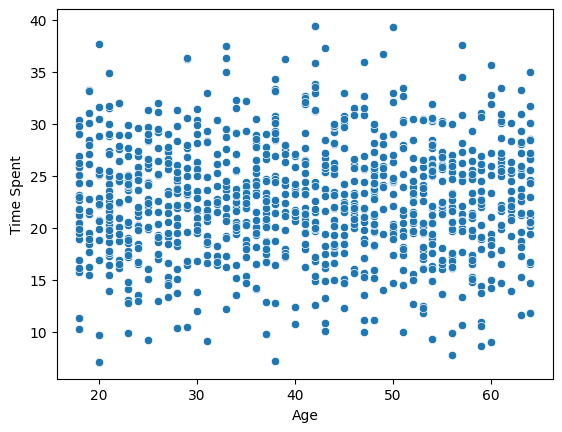

In [22]:
#Age and time spent:
x_ctr1 = df[['Age']]
y_ctr1 = df['Time Spent']
model_ctr1 = LinearRegression()
model_ctr1.fit(x_ctr1, y_ctr1)

sns.scatterplot(x='Age', y='Time Spent', data=df)
sns.lineplot(x='Age', y=model_ctr1.predict(x_ctr1), color='red')
plt.xlabel('Age')
plt.ylabel('Time Spent')
plt.title('Regression Line for Time Spent and Age')
plt.show()

Therefore we can conclude **Age** does not contribute to a significant change in CTR and time spent.

In [9]:
#Location vs time spent & CTR
df.groupby('Location')[['Time Spent']].mean()



,Time Spent
Location,
Location1,22.707286
Location2,22.648998
Location3,22.787691


In [10]:
df.groupby('Location')[['CTR']].mean()

,CTR
Location,
Location1,0.110217
Location2,0.108517
Location3,0.108708


Based on the mean result, we can conclude **Location** does not have significant impact on CTR or time spent.

In [11]:
#Device vs time spent & CTR
df.groupby('Device')[['Time Spent']].mean()

,Time Spent
Device,
Device1,22.635032
Device2,22.890021
Device3,22.612276


In [12]:
df.groupby('Device')[['CTR']].mean()

,CTR
Device,
Device1,0.109634
Device2,0.109868
Device3,0.107993


Here we can see that **Device** does not have significant impact on CTR or time spent either.

In [27]:
#Variant vs time spent & CTR
df.groupby('Variant')[['Time Spent']].mean()

,Time Spent
Variant,
Control,20.070781
Variant A,24.805547
Variant B,23.343783


In [28]:
df.groupby('Variant')[['CTR']].mean()

,CTR
Variant,
Control,0.098554
Variant A,0.120269
Variant B,0.108933


Finally we can identify that **Variant** contribute to different level of CTR and time spent compared to the control group variant. We will dig deeper into it.

First for **Location**:

In [30]:
#For Location and Time Spent
loc_1 = df[df['Location'] == 'Location1']['Time Spent']
loc_2 = df[df['Location'] == 'Location2']['Time Spent']
loc_3 = df[df['Location'] == 'Location3']['Time Spent']

p_val = stats.f_oneway(loc_1, loc_2, loc_3)
print(p_val)


F_onewayResult(statistic=0.053578839670573676, pvalue=0.9478339402848069)


In [31]:
#For Location and CTR
loc_1 = df[df['Location'] == 'Location1']['CTR']
loc_2 = df[df['Location'] == 'Location2']['CTR']
loc_3 = df[df['Location'] == 'Location3']['CTR']

p_val = stats.f_oneway(loc_1, loc_2, loc_3)
print(p_val)

F_onewayResult(statistic=0.5792245145655729, pvalue=0.5605211716238133)


For 3 locations, we concluded previously that they did not have significant differences. 

Now Based on Anova test, pvalues are too big that we say there is **no statistically significant difference** between locations.

We may say **Location does not result in lift in CTR and Time Spent**.

We then go on with **Devices**.

In [33]:
#For Device and Time Spent
loc_1 = df[df['Device'] == 'Device1']['Time Spent']
loc_2 = df[df['Device'] == 'Device2']['Time Spent']
loc_3 = df[df['Device'] == 'Device3']['Time Spent']

p_val = stats.f_oneway(loc_1, loc_2, loc_3)
print(p_val)

F_onewayResult(statistic=0.26645371811833884, pvalue=0.7661459958744103)


In [34]:
#For Device and CTR
loc_1 = df[df['Device'] == 'Device1']['CTR']
loc_2 = df[df['Device'] == 'Device2']['CTR']
loc_3 = df[df['Device'] == 'Device3']['CTR']

p_val = stats.f_oneway(loc_1, loc_2, loc_3)
print(p_val)

F_onewayResult(statistic=0.7105872492654717, pvalue=0.4916042399968955)


For 3 devices, we also concluded previously that they did not have significant differences. 

Now Based on Anova test, pvalues are again too big that we also say there is **no statistically significant difference** between devices.

We may say **Device does not result in lift in CTR and Time Spent**.

We then go on with **Variants**.

In [35]:
# checking variant and time spent
var1 = df[df['Variant']=='Variant A']['Time Spent']
var2 = df[df['Variant']=='Variant B']['Time Spent']
control = df[df['Variant']=='Control']['Time Spent']

p_val = stats.f_oneway(var1, var2, control)
print(p_val)

F_onewayResult(statistic=75.60840947416146, pvalue=2.676826588910432e-31)


In [36]:
# checking variant and CTR
var1 = df[df['Variant']=='Variant A']['CTR']
var2 = df[df['Variant']=='Variant B']['CTR']
control = df[df['Variant']=='Control']['CTR']

p_val = stats.f_oneway(var1, var2, control)
print(p_val)

F_onewayResult(statistic=93.58891593622702, pvalue=5.638952705781554e-38)


Based on the ANOVA, we can see that both p-values are pretty small. Therefore it means that the variants and control group have totally different impact on the CTR and time spent. 

We can conclude that **Variant is the feature that results in CTR and Time Spent lift**.

Next,


**Conduct statistical testing to determine if there is a statistically significant difference between the features and the control group.**

